## Solving the Problem
As you can see, manually creating solutions is a tedious task and requires taking into account each constraint carefully. This is the reason the `Dispatcher` class was created. This class allow us to just define the order in which operations are sequenced and the machines in which they are processed. The `Dispatcher` class will take care of the rest.

Let's see an example of how to use the `Dispatcher` class to solve the previous instance. In this case, a reasonable solution is to process the operations in the order they are defined in the instance. We can do this as follows:

In [1]:
from job_shop_lib import JobShopInstance, Operation

CPU = 0
GPU = 1
DATA_CENTER = 2

job_1 = [Operation(CPU, 1), Operation(GPU, 1), Operation(DATA_CENTER, 7)]
job_2 = [Operation(GPU, 5), Operation(DATA_CENTER, 1), Operation(CPU, 1)]
job_3 = [Operation(DATA_CENTER, 1), Operation(CPU, 3), Operation(GPU, 2)]

jobs = [job_1, job_2, job_3]

instance = JobShopInstance(jobs, name="Example")

In [2]:
from job_shop_lib.dispatching import Dispatcher

dispatcher = Dispatcher(instance)

for i in range(3):
    dispatcher.dispatch(job_1[i], job_1[i].machine_id)
    dispatcher.dispatch(job_2[i], job_2[i].machine_id)
    dispatcher.dispatch(job_3[i], job_3[i].machine_id)

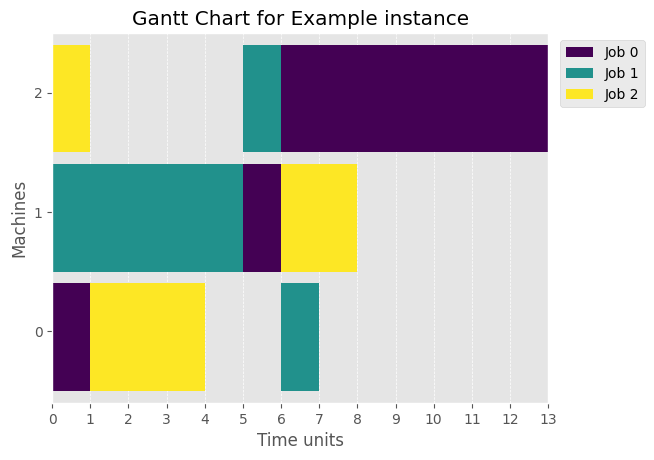

In [3]:
from job_shop_lib.visualization import plot_gantt_chart
import matplotlib.pyplot as plt

plt.style.use("ggplot")

_ = plot_gantt_chart(dispatcher.schedule)


A solver is any `Callable` object that takes as input a `JobShopInstance` class and returns a `Schedule` with a complete solution of the instance.

In this example, we are going to use the `CPSolver` class, contained inside `job_shop_lib.solvers` package, which uses [CP-SAT solver from Google OR-Tools](https://developers.google.com/optimization/cp/cp_solver).

In [4]:
from job_shop_lib.constraint_programming import ORToolsSolver

solver = ORToolsSolver()
schedule = solver(instance)
schedule.schedule

[[S-Op(operation=O(m=0, d=1, j=0, p=0), start_time=0, machine_id=0),
  S-Op(operation=O(m=0, d=3, j=2, p=1), start_time=1, machine_id=0),
  S-Op(operation=O(m=0, d=1, j=1, p=2), start_time=10, machine_id=0)],
 [S-Op(operation=O(m=1, d=1, j=0, p=1), start_time=1, machine_id=1),
  S-Op(operation=O(m=1, d=5, j=1, p=0), start_time=2, machine_id=1),
  S-Op(operation=O(m=1, d=2, j=2, p=2), start_time=7, machine_id=1)],
 [S-Op(operation=O(m=2, d=1, j=2, p=0), start_time=0, machine_id=2),
  S-Op(operation=O(m=2, d=7, j=0, p=2), start_time=2, machine_id=2),
  S-Op(operation=O(m=2, d=1, j=1, p=1), start_time=9, machine_id=2)]]

This class returns a `Schedule` object with a complete solution of the instance. It also set some metadata of the solution, such as the time it took to solve the instance and the status of the solution:

In [5]:
print(f"Is complete?: {schedule.is_complete()}")
print(f"Meta data: {schedule.metadata}")
print(f"Makespan: {schedule.makespan()}")

Is complete?: True
Meta data: {'status': 'optimal', 'elapsed_time': 0.017614512998989085, 'makespan': 11, 'solved_by': 'ORToolsSolver'}
Makespan: 11


Finally, we can plot the gantt chart of the solution using the `plot_gantt_chart` method.

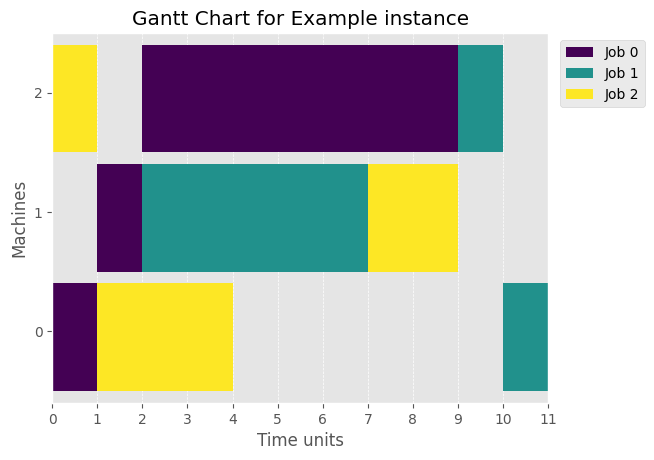

In [6]:
_ = plot_gantt_chart(schedule)